#VBA. Написание макросов в Excel.
#Упражнения для работы с данными по жилым домам
#Подготовил Подрядчиков Владимир Валерьевич

Для рассмотрение таблицы с данными подгрузим её с помощью pandas.

In [2]:
import pandas as pd
houses = pd.read_table('kc_house_data.csv', sep=',')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


В файле Excel содержится два листа. На первом таблица с данными, на втором формулировка заданий и вывод необходимых по ним данных.


## Исследование данных
### 1. Как много NAN значений в колонке yr_built?



```
Sub CountNaN()
    Dim nanCount As Long
    Dim wsData As Worksheet
    Dim wsMac As Worksheet
    Dim yrColumn As Range

    Set wsData = ThisWorkbook.Worksheets(1)
    Set wsMac = ThisWorkbook.Worksheets(2)

    Set yrColumn = wsData.Range("A1").EntireRow.Find(What:="yr_built")
    
    nanCount = Application.WorksheetFunction.CountIf(yrColumn, "N/A")
    wsMac.Range("A3").Value = "Количество значений NAN в колонке " & yrColumn & ":"
    wsMac.Range("B3").Value = nanCount

    
End Sub
```

Вывод:  
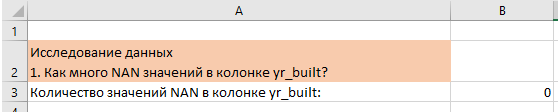


### 2. Сколько уникальных значений присутствует в колонке yr_renovated?


```
Sub CountUniqueValues()
    Dim wsData As Worksheet
    Dim wsMac As Worksheet
    Dim formula As String
    Dim lastRow As Long
    

    Set wsData = ThisWorkbook.Worksheets(1)
    Set wsMac = ThisWorkbook.Worksheets(2)

    lastRow = wsData.Cells(wsData.Rows.Count, "P").End(xlUp).Row
    formula = "=SUMPRODUCT(IF(ISBLANK(" & wsData.Name & "!P2:P" & lastRow & "),0,1/COUNTIF(" & wsData.Name & "!P2:P" & lastRow & ", P2:P" & lastRow & ")))"

    wsMac.Range("B6").FormulaArray = formula
    wsMac.Range("A6").Value = "Количество уникальных значений в столбце yr_renovated:"
End Sub
```

Вывод:  

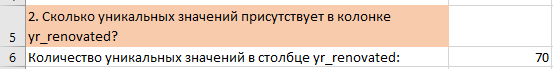



### 3. Чему равняется max, min, mean и std значения колонки price?  


```
Sub CalculateStatistics()
    Dim wsData As Worksheet
    Dim wsMac As Worksheet
    Dim priceColumn As Range
    Dim priceMax As Double
    Dim priceMin As Double
    Dim priceMean As Double
    Dim priceStd As Double
    Dim lastRow As Long

    Set wsData = ThisWorkbook.Worksheets(1)
    Set wsMac = ThisWorkbook.Worksheets(2)
    Set priceColumn = wsData.Rows(1).Find(What:="price", LookIn:=xlValues, LookAt:=xlWhole)

    lastRow = wsData.Cells(wsData.Rows.Count, priceColumn.Column).End(xlUp).Row
    Set priceColumn = wsData.Range(wsData.Cells(2, priceColumn.Column), wsData.Cells(lastRow, priceColumn.Column))


    priceMax = Application.WorksheetFunction.Max(priceColumn)
    priceMin = Application.WorksheetFunction.Min(priceColumn)
    priceMean = Application.WorksheetFunction.Average(priceColumn)
    priceStd = Application.WorksheetFunction.StDev(priceColumn)
    
    wsMac.Range("A9").Value = "max:"
    wsMac.Range("B9").Value = priceMax
    
    wsMac.Range("A10").Value = "min:"
    wsMac.Range("B10").Value = priceMin
    
    wsMac.Range("A11").Value = "mean:"
    wsMac.Range("B11").Value = priceMean
    
    wsMac.Range("A12").Value = "std:"
    wsMac.Range("B12").Value = priceStd

End Sub
```

Вывод:  

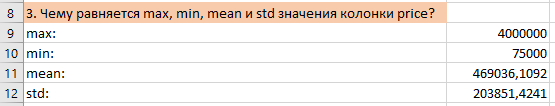



##Выбор данных
###Сколько ванн в доме под строчкой 318?



```
Option Explicit

Sub CountBathrooms()
    Dim wsData As Worksheet
    Dim wsMac As Worksheet
    Dim columnNumber As Long
    Dim bedroomsCount As String
    
    Set wsMac = ThisWorkbook.Worksheets(2)
    Set wsData = ThisWorkbook.Worksheets(1)
    

    columnNumber = wsData.Rows(1).Find(What:="bedrooms", LookIn:=xlValues, LookAt:=xlWhole).Column
    bedroomsCount = wsData.Cells(318, columnNumber).Value
    wsMac.Range("A15").Value = "Количество спален для строки с индексом 318: " & bedroomsCount
End Sub
```

Вывод:  

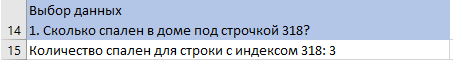



###Чему ровняется столбец condition дома с индексом, равным 252000300?



```
Sub GetCondition()
    Dim wsData As Worksheet
    Dim wsMac As Worksheet
    Dim condition As Variant
    Dim idToFind As Long
    Dim rowIndex As Long
    
    Set wsData = ThisWorkbook.Worksheets(1)
    Set wsMac = ThisWorkbook.Worksheets(2)
    
    idToFind = 252000300
    rowIndex = Application.Match(idToFind, wsData.Columns(1), 0)
    condition = wsData.Cells(rowIndex, wsData.Rows(1).Find(What:="condition", LookIn:=xlValues, LookAt:=xlWhole).Column).Value
    wsMac.Range("A18").Value = "Состояние дома с индексом " & idToFind & ": " & condition

End Sub

```  

Вывод:  

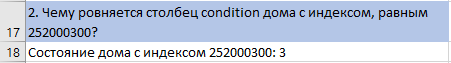



### Чему ровняется значение столбца floors для домов, построенных в 1999 с 5 спальнями и sqft living равным 3400?

```
Sub GetFloors()
    Dim wsData As Worksheet
    Dim wsMac As Worksheet
    Dim filteredRows As Long
    Dim rowIndex As Long
    Dim idArray() As Variant
    Dim floorsArray() As Variant
    Dim i As Long
    
    Set wsData = ThisWorkbook.Worksheets(1)
    Set wsMac = ThisWorkbook.Worksheets(2)

    Dim yrBuilt As Long
    Dim bedrooms As Long
    Dim sqftLiving As Long
    
    yrBuilt = 1999
    bedrooms = 5
    sqftLiving = 3400
    
    ReDim idArray(1 To 1) As Variant
    ReDim floorsArray(1 To 1) As Variant
    filteredRows = 0

    For rowIndex = 2 To wsData.Cells(wsData.Rows.Count, 1).End(xlUp).Row
        If wsData.Cells(rowIndex, 15).Value = yrBuilt And _
           wsData.Cells(rowIndex, 4).Value = bedrooms And _
           wsData.Cells(rowIndex, 6).Value = sqftLiving Then
            filteredRows = filteredRows + 1
            ReDim Preserve idArray(1 To filteredRows) As Variant
            ReDim Preserve floorsArray(1 To filteredRows) As Variant
            idArray(filteredRows) = wsData.Cells(rowIndex, 1).Value
            floorsArray(filteredRows) = wsData.Cells(rowIndex, 7).Value
        End If
    Next rowIndex

    wsMac.Range("A21").Value = "ID"
    wsMac.Range("B21").Value = "Floors"
    For i = 1 To filteredRows
        wsMac.Cells(i + 21, 1).Value = idArray(i)
        wsMac.Cells(i + 21, 2).Value = floorsArray(i)
    Next i
End Sub

```  

Вывод:  
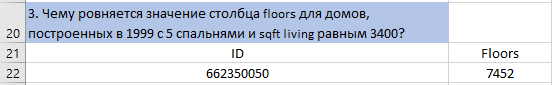


### Какая цена самого дорого дома, построенного в промежутке с 1991 по 2000 года?

```
Sub GetMaxPrice()
    Dim wsData As Worksheet
    Dim wsMac As Worksheet
    Dim maxPrice As Double
    Dim filteredRange As Range
    Dim queryResult As Range
    
    Set wsData = ThisWorkbook.Worksheets(1)
    Set wsMac = ThisWorkbook.Worksheets(2)
    

    Set filteredRange = wsData.Range("A1").CurrentRegion
    filteredRange.AutoFilter Field:=wsData.Rows(1).Find(What:="yr_built").Column, Criteria1:=">=1991", Operator:=xlAnd, Criteria2:="<=2000"
    
    Set queryResult = filteredRange.Offset(1, 0).Resize(filteredRange.Rows.Count - 1).SpecialCells(xlCellTypeVisible)
    maxPrice = Application.WorksheetFunction.Max(queryResult.Columns(3))
    
    wsMac.Range("A25").Value = "Максимальная цена для домов, построенных с 1991 до 2000 года: " & maxPrice
End Sub
```
Вывод:  

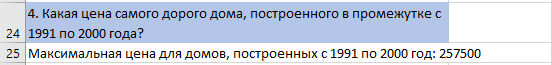



##3. Создание новых колонок  
###Создайте новую колонку с называнием sqft_aver_floor, где будет раниться результат вычисления деления sqft_living на floors.



```
Sub AddNewColumnToMainTable()
    Dim wsData As Worksheet
    Dim lastRow As Long
    Dim lastColumn As Long
    Dim sqftAverFloorValue As Double
    Dim i As Long

    Set wsData = ThisWorkbook.Worksheets(1)
    lastRow = wsData.Cells(wsData.Rows.Count, "A").End(xlUp).Row
    lastColumn = wsData.Cells(wsData.Rows.Count, "A").End(xlToLeft).Column
    wsData.Cells(1, 22).Value = "sqft_aver_floor"

    For i = 2 To lastRow
        sqftAverFloorValue = wsData.Cells(i, "F").Value / wsData.Cells(i, "H").Value
        wsData.Cells(i, 22).Value = sqftAverFloorValue
    Next i
End Sub

```



###Создайте новый столбец с названием sqm_tot_living пользуясь колонкой sqft_living и зная, что 1 foot = 0.3048 метрам.

```
Sub AddNewColumn_sqm_tot_living()
    Dim wsData As Worksheet
    Dim lastRow As Long
    Dim sqmTotLivingValue As Double
    Dim i As Long
    
    Set wsData = ThisWorkbook.Worksheets(1)
    lastRow = wsData.Cells(wsData.Rows.Count, "A").End(xlUp).Row
    
    wsData.Cells(1, 23).Value = "sqm_tot_living"
    
    For i = 2 To lastRow
        sqmTotLivingValue = wsData.Cells(i, "T").Value * 0.3048 * 0.3048
        wsData.Cells(i, 23).Value = sqmTotLivingValue
    Next i
End Sub
```

Ниже скриншот таблицы с двумя новыми столбцами  

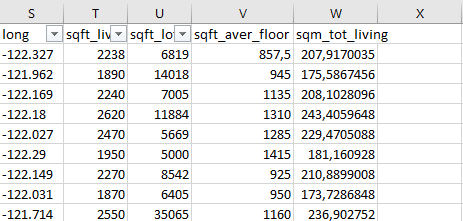